In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import statsmodels.api as sm
import statsmodels.formula.api as smf

from IPython.display import Image

### 逸脱度
* 与えられたデータに対してモデルの"当てはまりの良さ"として尤度が定義される
* 4章では尤度の逆としてモデルの"当てはまりの悪さ"の尺度として逸脱度を考える
* 尤度に(-2)を乗算した値として逸脱度は定義される
* 尤度が最大（=逸脱度が最小）になるモデルはfullmodel
* fullmodelの逸脱度が最小逸脱度となる
* 逸脱度-最小逸脱度として残差逸脱度が定義される
* 残差逸脱度が0に近いほどモデルとデータがよくフィットしている

In [133]:
data= pd.read_csv("chap4_data.csv")
data.dtypes

y      int64
x    float64
f     object
dtype: object

In [134]:
data

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C
5,4,8.32,C
6,9,10.61,C
7,9,10.06,C
8,9,9.93,C
9,11,10.43,C


### full model
* データ数と同じだけのパラメータが存在すれば全データの再現が可能なモデルを作成できる
* 上記モデルをfullmodelと（本書籍では）読んでいる
* fullmodelの最尤推定の実装はP75の下部に以下の記述がある
* ここでは100個のデータ{y_i}に対して、平均を{lambda_i}={y_1, y_2,...y_100}とおいたときの対数尤度の和でfullmodelの対数尤度を計算している

In [100]:
#第2引数にリストを与えると各データが自身をパラメータとして受け取るように振る舞っている
#これが仕様っぽい
sum([(sct.poisson.logpmf(data.y[i], data.y[i])) for i in range(0, 100)])
#sum(sct.poisson.logpmf(data.y, data.y))

-192.8897525244958

In [101]:
#最小逸脱度
#fullmodelの対数尤度値に-2を乗算した値として最小逸脱度が定義される
-2 * sum([(sct.poisson.logpmf(data.y[i], data.y[i])) for i in range(0, 100)])

385.7795050489916

### null model
* パラメータ数がデータ数と等しいfullmodelに対して、パラメータ数を最小(=1)としたモデル

In [135]:
#1以外の値を指定するとエラーが発生する
formula = 'y ~ 1'
data = data
family = sm.families.Poisson()
model = smf.glm(formula=formula, data=data, family=family)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Sun, 23 Feb 2020   Deviance:                       89.507
Time:                        12:33:37   Pearson chi2:                     87.1
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0580      0.036     57.586      0.000       1.988       2.128
==============================================================================
"""

In [136]:
#上の表においてDevienceは残差逸脱度と一致する
#89.507 = (-2) * (-237.64) - 385.77

### モデル選択問題
* モデルのパラメータ数を増やせば（=モデルを複雑にすれば）尤度を上げることができるがオーバフィッテイングしてしまう
* "良い推定"と"良い予測"は一致するとは限らない
* AIC = (-2) * (最大対数尤度 - パラメータ数)
* AICが低いモデルほど望ましい

In [137]:
result.llf

-237.6432213092867

In [150]:
beta1 = result.params.values[0]
mu = np.exp(beta1)
print(beta1, mu)

2.057962510002712 7.830000000000001


#### fullモデルのAIC
* (-2) * (-192.88 - 100) = 585.76

#### nullモデルのAIC
* (-2) * (-237.64 - 1) = 477.28

#### モデル選択問題
* Y ~ x モデルが最もAICが低い
* このモデルを選べば良いという結論になる

### 平均対数尤度
* 平均対数尤度と最大対数尤度の差のバイアスがおおよそパラメータ数に等しいことを確認する

(array([ 0.,  0.,  1.,  0.,  3.,  4., 10.,  4.,  7.,  5.,  5.,  2.,  5.,
         3.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Patch objects>)

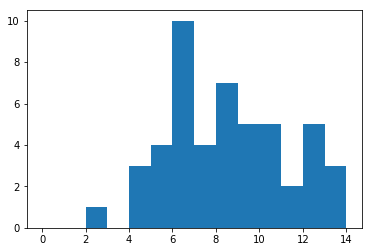

In [115]:
#mu=8のポアソン乱数を100個からなる分布を作成する
#上記分布に対して最大対数尤度を取得する
#上記の最大対数尤度200個のヒストグラムを作成する

#まずはデータの作成
data = sct.poisson.rvs(8, size=50)  
plt.hist(data, bins=np.arange(0, 15, 1))

In [116]:
#GLMのデータはpanda.datasetである必要がある
#https://note.nkmk.me/python-pandas-dataframe-values-columns-index/
data = pd.DataFrame(data)

#最大対数尤度の取得
formula = 'data ~ 1'
data = data
family = sm.families.Poisson()
model = smf.glm(formula=formula, data=data, family=family)
model.fit().llf

-124.00806363761079

In [117]:
llf_list = []

#平均対数尤度の取得
for i in range(0, 200):
    data = sct.poisson.rvs(8, size=50)  
    data = pd.DataFrame(data)
    formula = 'data ~ 1'
    data = data
    family = sm.families.Poisson()
    model = smf.glm(formula=formula, data=data, family=family)
    llf_list.append(model.fit().llf)

In [118]:
sum(llf_list) / 200

-122.06846469128546

#### バイアスの分布

In [231]:
import copy

def return_bias():
    #真のモデルからデータを取得
    data = sct.poisson.rvs(8, size=50)  
    data = pd.DataFrame(data)
    #最大対数尤度を取得
    formula = 'data ~ 1'
    data = data
    family = sm.families.Poisson()
    original_model = smf.glm(formula=formula, data=data, family=family)
    llf = original_model.fit().llf

    #beta1 = result.params.values[0]
    #mu = np.exp(beta1)
    #print(model.endog)
    #print(model.fit().params, llf)

    for i in range(0, 200):
        #上で作成したmodelを使い回す
        model = copy.copy(original_model)
        #print(model.fit().params, model.fit().llf)
        data = sct.poisson.rvs(8, size=50)      
        model.endog = data
        llf_list.append(model.fit().llf)

    average_llf = sum(llf_list)/len(llf_list)

    bias = llf - average_llf
    #print(bias)
    #print(model.endog)
    return bias

In [232]:
bias_list = [return_bias() for i in range(0, 2000)]

In [233]:
sum(bias_list)/len(bias_list)

0.2380676705675661

In [ ]:
#うーむ、標本平均は1になるはずだがそうはならなかった...